### Oppstart


In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline

In [2]:
css()

In [3]:
plot = lambda x, lw = 5: x.plot(figsize=(10,5), lw=lw)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes

In [7]:
ngram = nb.nb_ngram('krig', smooth=2, corpus='avis', years = (1920, 2013))

In [8]:
ngram[10:30]

,krig
1930,0.002599
1931,0.002361
1932,0.002505
1933,0.002547
1934,0.002588
1935,0.004391
1936,0.005341
1937,0.004507
1938,0.005188
1939,0.008806


## Plotting

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

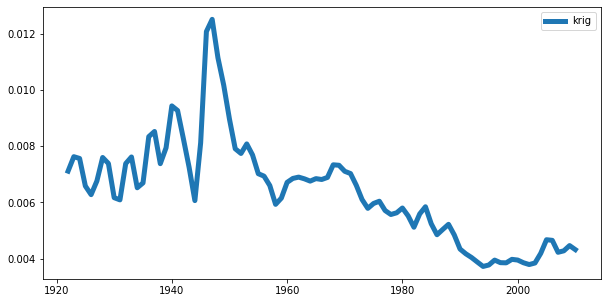

In [9]:
plot(nb.nb_ngram("krig", smooth=3, years=(1920, 2010)));

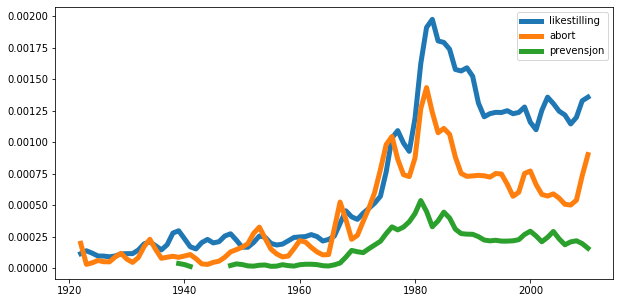

In [10]:
plot(nb.nb_ngram("likestilling, abort, prevensjon", smooth=3, years=(1920, 2010)));

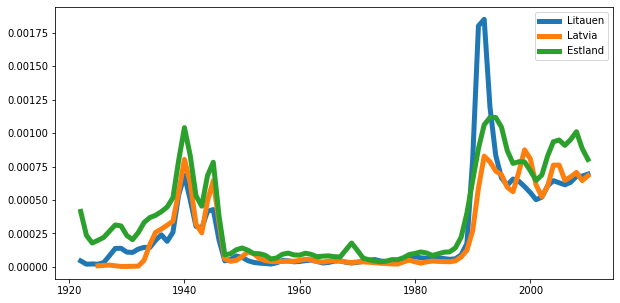

In [14]:
plot(nb.nb_ngram("Litauen, Latvia, Estland", smooth=3, corpus = 'avis', years=(1920, 2010)));

# Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## Definer koblinger til *is*

I eksemplet ser vi på **is**, sjekk [Bokmålsordboka](https://ordbok.uib.no/perl/ordbok.cgi?OPP=is&ant_bokmaal=5&ant_nynorsk=5&begge=+&ordbok=begge) om ordet.

In [15]:
g_is = nb.make_graph('is', cutoff=12, lang='nob')

In [16]:
g_ice = nb.make_graph('ice', cutoff=12, lang='eng')

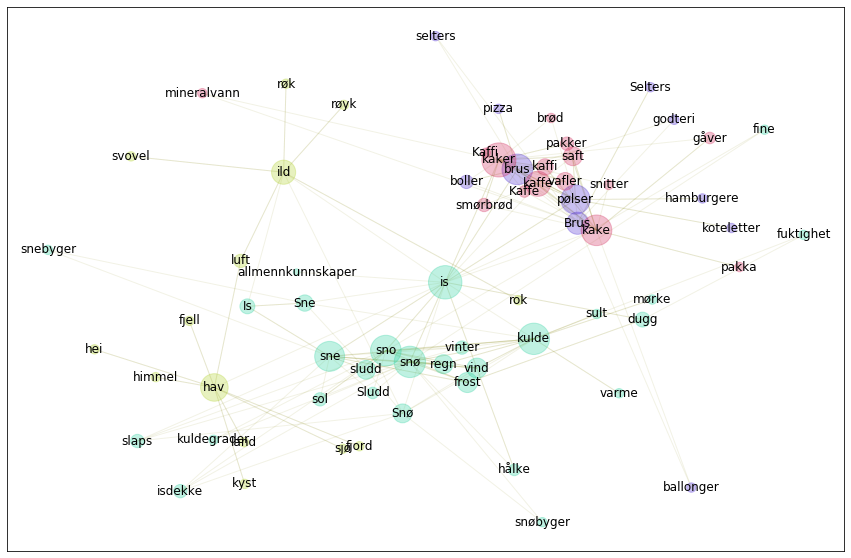

In [17]:
gnl.show_graph(g_is, spread=1.8, fontsize = 12)

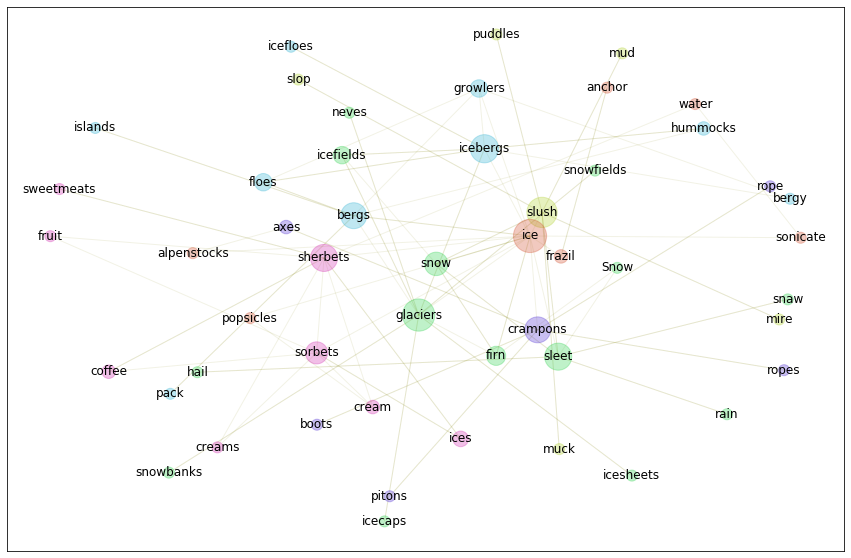

In [18]:
gnl.show_graph(g_ice, spread=1.8, fontsize = 12)

In [19]:
gnl.show_communities(g_is)

hav-ild :  hav, ild, luft, kyst, hei, land, fjell, røyk, himmel, røk, sjø, fjord, svovel, rok

is-snø :  is, snø, kulde, sno, sne, vind, frost, Snø, sludd, regn, Sne, dugg, Is, vinter, slaps, sol, isdekke, hålke, Sludd, fine, varme, kuldegrader, fuktighet, snøbyger, mørke, snebyger, sult, allmennkunnskaper

brus-pølser :  brus, pølser, Brus, boller, selters, koteletter, Selters, godteri, hamburgere, ballonger, pizza

kaker-kake :  kaker, kake, kaffe, saft, vafler, kaffi, smørbrød, pakker, Kaffe, gåver, mineralvann, Kaffi, snitter, brød, pakka



In [20]:
gnl.show_communities(g_ice)

slush-slop :  slush, slop, mud, puddles, mire, muck

glaciers-sleet :  glaciers, sleet, snow, firn, icefields, icesheets, snaw, hail, snowfields, rain, snowbanks, icecaps, Snow, neves

icebergs-bergs :  icebergs, bergs, growlers, floes, hummocks, islands, icefloes, bergy, pack

crampons-axes :  crampons, axes, ropes, pitons, boots, rope

sherbets-sorbets :  sherbets, sorbets, ices, coffee, cream, sweetmeats, creams, fruit

ice-frazil :  ice, frazil, water, sonicate, anchor, alpenstocks, popsicles



# Hva med andre ord og betydningsvarianter?

In [21]:
krig = nb.make_graph('krig', cutoff=20)

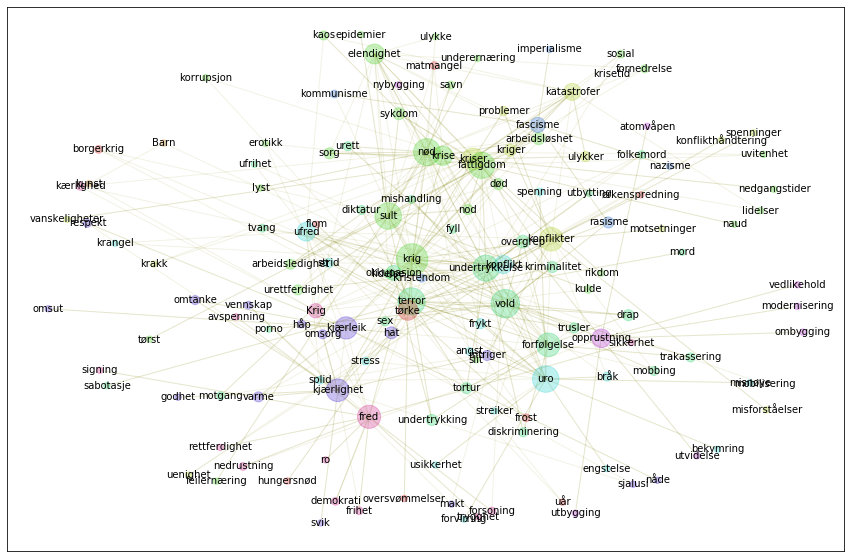

In [22]:
gnl.show_graph(krig, spread=2)

In [23]:
gnl.show_communities(krig)

konflikter-kriser :  konflikter, kriser, katastrofer, kriger, ulykker, problemer, krakk, misforståelser, konflikthåndtering, uenighet, motsetninger, spenninger, vanskeligheter

krig-nød :  krig, nød, sult, fattigdom, elendighet, krise, sykdom, arbeidsløshet, død, sorg, arbeidsledighet, urettferdighet, nod, lidelse, kaos, savn, kulde, sosial, fornedrelse, epidemier, korrupsjon, uvitenhet, lidelser, tørst, nedgangstider, underernæring, erotikk, rikdom, slit, feilernæring, lyst, ulykke, naud, krisetid, mobilisering

vold-terror :  vold, terror, undertrykkelse, forfølgelse, okkupasjon, overgrep, undertrykking, tortur, kriminalitet, drap, trusler, sex, trakassering, urett, mobbing, diktatur, diskriminering, tvang, folkemord, mishandling, fyll, motgang, porno, utbytting, mord, ufrihet, sabotasje

uro-ufred :  uro, ufred, konflikt, frykt, strid, bråk, angst, splid, spenning, stress, streiker, usikkerhet, krangel, engstelse, forvirring, misnøye, bekymring

fascisme-rasisme :  fascisme, rasisme